# Differential expressed AS event

In [1]:
import os
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
anndata_psi = "../data/fsla_PSI_N10_exon.h5ad"
output_path="../data/"
output_name="fsla_PSI_N10_exon_GO"
outrigger_path = "./outrigger_output/"

In [3]:
adata = anndata.read_h5ad(anndata_psi)
df_psi_raw = adata.to_df()
df_psi_raw

,isoform1=junction:10:100246936-100253420:-|isoform2=junction:10:100250333-100253420:-@exon:10:100250248-100250332:-@junction:10:100246936-100250247:-,isoform1=junction:10:100256477-100260965:-|isoform2=junction:10:100260320-100260965:-@exon:10:100260218-100260319:-@junction:10:100256477-100260217:-,isoform1=junction:10:100489762-100490705:-|isoform2=junction:10:100490323-100490705:-@exon:10:100490008-100490322:-@junction:10:100489762-100490007:-,isoform1=junction:10:100496432-100497666:-|isoform2=junction:10:100497281-100497666:-@exon:10:100497135-100497280:-@junction:10:100496432-100497134:-,isoform1=junction:10:100498208-100499159:-|isoform2=junction:10:100498805-100499159:-@exon:10:100498705-100498804:-@junction:10:100498208-100498704:-,isoform1=junction:10:100499599-100502253:-|isoform2=junction:10:100500160-100502253:-@exon:10:100500110-100500159:-@junction:10:100499599-100500109:-,isoform1=junction:10:100516961-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100516961-100526398:-,isoform1=junction:10:100523930-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100523930-100526398:-,isoform1=junction:10:100983818-100986748:-|isoform2=junction:10:100984075-100986748:-@exon:10:100983948-100984074:-@junction:10:100983818-100983947:-,isoform1=junction:10:101611770-101624744:-|isoform2=junction:10:101612478-101624744:-@exon:10:101612337-101612477:-@junction:10:101611770-101612336:-,...,isoform1=junction:X:156022146-156022698:+@exon:X:156022699-156022834:+@junction:X:156022835-156023011:+|isoform2=junction:X:156022146-156022322:+@exon:X:156022323-156022539:+@junction:X:156022540-156023011:+,isoform1=junction:X:2723365-2738199:+@exon:X:2738200-2738256:+@junction:X:2738257-2740778:+|isoform2=junction:X:2723365-2726259:+@exon:X:2726260-2726373:+@junction:X:2726374-2740778:+,isoform1=junction:X:41342837-41343736:+@exon:X:41343737-41343822:+@junction:X:41343823-41344029:+|isoform2=junction:X:41342837-41343215:+@exon:X:41343216-41343351:+@junction:X:41343352-41344029:+,isoform1=junction:X:47657291-47657781:-@exon:X:47657183-47657290:-@junction:X:47652145-47657182:-|isoform2=junction:X:47657640-47657781:-@exon:X:47657572-47657639:-@junction:X:47652145-47657571:-,isoform1=junction:X:47657291-47657781:-@novel_exon:X:47657205-47657290:-@junction:X:47652145-47657204:-|isoform2=junction:X:47657640-47657781:-@exon:X:47657572-47657639:-@junction:X:47652145-47657571:-,isoform1=junction:X:63510080-63560831:-@exon:X:63509944-63510079:-@junction:X:63432492-63509943:-|isoform2=junction:X:63517083-63560831:-@exon:X:63516910-63517082:-@junction:X:63432492-63516909:-,isoform1=junction:X:63510080-63560831:-@exon:X:63509944-63510079:-@junction:X:63432492-63509943:-|isoform2=junction:X:63558711-63560831:-@novel_exon:X:63558618-63558710:-@junction:X:63432492-63558617:-,isoform1=junction:X:63517083-63560831:-@exon:X:63516910-63517082:-@junction:X:63432492-63516909:-|isoform2=junction:X:63558711-63560831:-@novel_exon:X:63558618-63558710:-@junction:X:63432492-63558617:-,isoform1=junction:X:77899594-77901920:+@novel_exon:X:77901921-77902015:+@junction:X:77902016-77902642:+|isoform2=junction:X:77899594-77901743:+@exon:X:77901744-77901867:+@junction:X:77901868-77902642:+,isoform1=junction:X:78945496-78952192:+@exon:X:78952193-78952335:+@junction:X:78952336-78960507:+|isoform2=junction:X:78945496-78947814:+@exon:X:78947815-78947863:+@junction:X:78947864-78960507:+
SRR18379095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR18379123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR18379125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR18379126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR18379127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...

#### Filter Events to Retain Only Those Present in At Least 10 Cells

In this step, we filter the events to keep only those that are present in at least 10 cells. 


In [4]:
#get number of cells per each event
df_psi_raw_t = df_psi_raw.T
df_psi_raw_t["count"] = df_psi_raw_t.ge(0.0).sum(axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

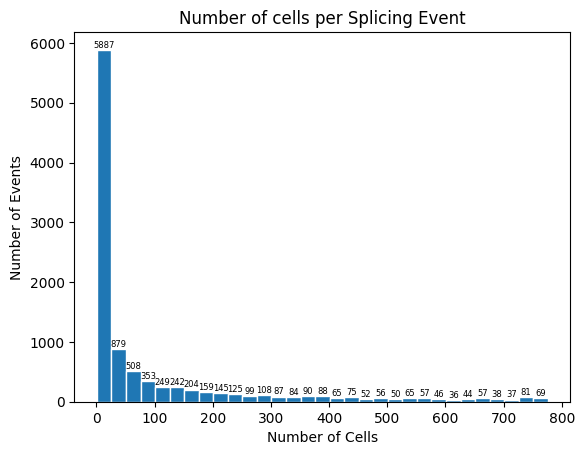

In [5]:
#plot event id vs sample number
freq, bins, patches = plt.hist(list(df_psi_raw_t["count"]), edgecolor='white', label='d', bins=range(1,800,25))

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom',
               fontsize = 6
               )
  n = n+1

# plt.legend()
plt.title("Number of cells per Splicing Event")
plt.xlabel("Number of Cells")
plt.ylabel("Number of Events")
plt.show

In [6]:
#only keep event which is exist in more than 25 cells include 25 cells
df_psi_raw_t_filter = df_psi_raw_t[df_psi_raw_t["count"] >=10]

In [7]:
df_psi_raw_t_filter.drop(columns=["count"], inplace=True)

/tmp/ipykernel_1803621/4183387654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_psi_raw_t_filter.drop(columns=["count"], inplace=True)


In [8]:
df_psi_raw_filter = df_psi_raw_t_filter.T
df_psi_raw_filter

,isoform1=junction:10:100516961-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100516961-100526398:-,isoform1=junction:10:100523930-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100523930-100526398:-,isoform1=junction:10:101611770-101624744:-|isoform2=junction:10:101612478-101624744:-@exon:10:101612337-101612477:-@junction:10:101611770-101612336:-,isoform1=junction:10:101624811-101672914:-|isoform2=junction:10:101667981-101672914:-@exon:10:101667886-101667980:-@junction:10:101624811-101667885:-,isoform1=junction:10:101667981-101673487:-|isoform2=junction:10:101673048-101673487:-@exon:10:101672915-101673047:-@junction:10:101667981-101672914:-,isoform1=junction:10:101799456-101803734:-|isoform2=junction:10:101800401-101803734:-@exon:10:101800242-101800400:-@junction:10:101799456-101800241:-,isoform1=junction:10:101800401-101806044:-|isoform2=junction:10:101804020-101806044:-@exon:10:101803735-101804019:-@junction:10:101800401-101803734:-,isoform1=junction:10:101804020-101807729:-|isoform2=junction:10:101806144-101807729:-@exon:10:101806045-101806143:-@junction:10:101804020-101806044:-,isoform1=junction:10:101804020-101807823:-|isoform2=junction:10:101806144-101807823:-@exon:10:101806045-101806143:-@junction:10:101804020-101806044:-,isoform1=junction:10:101807902-101813029:-|isoform2=junction:10:101810315-101813029:-@exon:10:101810184-101810314:-@junction:10:101807902-101810183:-,...,isoform1=junction:6:36596969-36599820:+@exon:6:36599821-36600276:+@junction:6:36600277-36601151:+|isoform2=junction:6:36596969-36598848:+@exon:6:36598849-36598983:+@junction:6:36598984-36601151:+,isoform1=junction:6:42929722-42935411:+@novel_exon:6:42935412-42935473:+@junction:6:42935474-42935573:+|isoform2=junction:6:42929722-42934474:+@exon:6:42934475-42934598:+@junction:6:42934599-42935573:+,isoform1=junction:7:44645519-44647656:+@exon:7:44647657-44647759:+@junction:7:44647760-44666735:+|isoform2=junction:7:44645519-44647443:+@exon:7:44647444-44647534:+@junction:7:44647535-44666735:+,isoform1=junction:7:45064647-45072725:+@exon:7:45072726-45072783:+@junction:7:45072784-45073459:+|isoform2=junction:7:45064647-45071749:+@exon:7:45071750-45071872:+@junction:7:45071873-45073459:+,isoform1=junction:7:45069962-45072725:+@exon:7:45072726-45072783:+@junction:7:45072784-45073459:+|isoform2=junction:7:45069962-45071749:+@exon:7:45071750-45071872:+@junction:7:45071873-45073459:+,isoform1=junction:7:72999163-72999760:-@exon:7:72999055-72999162:-@junction:7:72998791-72999054:-|isoform2=junction:7:72999551-72999760:-@exon:7:72999471-72999550:-@junction:7:72998791-72999470:-,isoform1=junction:7:91980334-91992157:+@exon:7:91992158-91992211:+@junction:7:91992212-91992884:+|isoform2=junction:7:91980334-91980872:+@exon:7:91980873-91980958:+@junction:7:91980959-91992884:+,isoform1=junction:8:66922393-66925436:-@exon:8:66922324-66922392:-@junction:8:66922115-66922323:-|isoform2=junction:8:66922726-66925436:-@exon:8:66922614-66922725:-@junction:8:66922115-66922613:-,isoform1=junction:9:21008147-21011588:-@exon:9:21008021-21008146:-@junction:9:21007120-21008020:-|isoform2=junction:9:21011439-21011588:-@novel_exon:9:21011344-21011438:-@junction:9:21007120-21011343:-,isoform1=junction:X:156022146-156022698:+@exon:X:156022699-156022834:+@junction:X:156022835-156023011:+|isoform2=junction:X:156022146-156022322:+@exon:X:156022323-156022459:+@junction:X:156022460-156023011:+
SRR18379095,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR18379123,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,...,0.926230,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR18379125,NaN,1.0,NaN,NaN,NaN,1.000000,1.0,1.0,NaN,1.0,...,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
SRR18379126,NaN,1.0,NaN,NaN,NaN,1.000000,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR18379127,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,

### Average PSI Value Per Cluster to Replace NaN Values

In this step, we calculate the average PSI value per event and per cluster to replace the `NaN` values. Some clusters may have missing values (`NaN`) for certain events, and replacing these with the cluster-wise averages helps to maintain data integrity for downstream analysis.


In [9]:
#get sample mean
df_psi_raw_filter['sample_mean'] = df_psi_raw_filter.mean(axis=1, skipna=True)

In [10]:
#merge to get ground truth and leiden cluster category
df_psi_raw_filter = pd.merge(df_psi_raw_filter, pd.DataFrame(adata.obs), left_index=True, right_index=True)

In [11]:
df_value_mean = df_psi_raw_filter.groupby(['predicted.celltype.l1'], as_index=False)["sample_mean"].mean()
df_value_mean.sample_mean = df_value_mean.sample_mean.round(3).astype(str)
dict_mean_cluster = dict(zip(df_value_mean["predicted.celltype.l1"], df_value_mean.sample_mean))
dict_mean_cluster

{'B': '0.652',
 'CD4 T': '0.659',
 'CD8 T': '0.659',
 'DC': '0.674',
 'Mono': '0.674',
 'NK': '0.655',
 'other': '0.661',
 'other T': '0.657'}

In [12]:
df_psi_raw_filter = df_psi_raw_filter.replace({"predicted.celltype.l1": dict_mean_cluster})
df_psi_raw_filter = df_psi_raw_filter.rename(columns={"predicted.celltype.l1": "psi_mean_cluster"})
df_psi_raw_filter

,isoform1=junction:10:100516961-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100516961-100526398:-,isoform1=junction:10:100523930-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100523930-100526398:-,isoform1=junction:10:101611770-101624744:-|isoform2=junction:10:101612478-101624744:-@exon:10:101612337-101612477:-@junction:10:101611770-101612336:-,isoform1=junction:10:101624811-101672914:-|isoform2=junction:10:101667981-101672914:-@exon:10:101667886-101667980:-@junction:10:101624811-101667885:-,isoform1=junction:10:101667981-101673487:-|isoform2=junction:10:101673048-101673487:-@exon:10:101672915-101673047:-@junction:10:101667981-101672914:-,isoform1=junction:10:101799456-101803734:-|isoform2=junction:10:101800401-101803734:-@exon:10:101800242-101800400:-@junction:10:101799456-101800241:-,isoform1=junction:10:101800401-101806044:-|isoform2=junction:10:101804020-101806044:-@exon:10:101803735-101804019:-@junction:10:101800401-101803734:-,isoform1=junction:10:101804020-101807729:-|isoform2=junction:10:101806144-101807729:-@exon:10:101806045-101806143:-@junction:10:101804020-101806044:-,isoform1=junction:10:101804020-101807823:-|isoform2=junction:10:101806144-101807823:-@exon:10:101806045-101806143:-@junction:10:101804020-101806044:-,isoform1=junction:10:101807902-101813029:-|isoform2=junction:10:101810315-101813029:-@exon:10:101810184-101810314:-@junction:10:101807902-101810183:-,...,isoform1=junction:7:72999163-72999760:-@exon:7:72999055-72999162:-@junction:7:72998791-72999054:-|isoform2=junction:7:72999551-72999760:-@exon:7:72999471-72999550:-@junction:7:72998791-72999470:-,isoform1=junction:7:91980334-91992157:+@exon:7:91992158-91992211:+@junction:7:91992212-91992884:+|isoform2=junction:7:91980334-91980872:+@exon:7:91980873-91980958:+@junction:7:91980959-91992884:+,isoform1=junction:8:66922393-66925436:-@exon:8:66922324-66922392:-@junction:8:66922115-66922323:-|isoform2=junction:8:66922726-66925436:-@exon:8:66922614-66922725:-@junction:8:66922115-66922613:-,isoform1=junction:9:21008147-21011588:-@exon:9:21008021-21008146:-@junction:9:21007120-21008020:-|isoform2=junction:9:21011439-21011588:-@novel_exon:9:21011344-21011438:-@junction:9:21007120-21011343:-,isoform1=junction:X:156022146-156022698:+@exon:X:156022699-156022834:+@junction:X:156022835-156023011:+|isoform2=junction:X:156022146-156022322:+@exon:X:156022323-156022459:+@junction:X:156022460-156023011:+,sample_mean,Sample,psi_mean_cluster,predicted.celltype.l2,leiden
SRR18379095,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.646761,151_2_50degRT_384w_PBMC_E5,0.655,NK,3
SRR18379123,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0.650031,170_maxima_384w_PBMC_B11,0.657,MAIT,6
SRR18379125,NaN,1.0,NaN,NaN,NaN,1.000000,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0.666113,170_maxima_384w_PBMC_G10,0.659,CD8 TEM,4
SRR18379126,NaN,1.0,NaN,NaN,NaN,1.000000,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0.662651,170_maxima_384w_PBMC_C8,0.652,Plasmablast,7
SRR18379127,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.669581,170_maxima_384w_PBMC_F10,0.674,CD14 Mono,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR18388394,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.656902,141_1_FS_384w_plexwell_PBMC_B01,0.659,CD4 TCM,0
SRR18388759,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,0.653385,141_1_FS_384w_plexwell_PBMC_F04,0.659,CD8 TEM,4
SRR18388760,NaN,1.0,NaN,NaN,NaN,0.888889,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.672292,141_1_FS_384w_plexwell_PBMC_E04,0.659,CD4 TCM,2
SRR18388761,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.647114,141_1_FS_384w_plexwell_PBMC_D04,0.659,CD4 TCM,0


In [13]:
#fill the nan value row using mean psi value per cluster, using str here otherwise will cause iteration error
df_psi_mod_mean_cluster = df_psi_raw_filter.apply(lambda x : x.fillna(value=df_psi_raw_filter["psi_mean_cluster"]))
df_psi_mod_mean_cluster

,isoform1=junction:10:100516961-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100516961-100526398:-,isoform1=junction:10:100523930-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100523930-100526398:-,isoform1=junction:10:101611770-101624744:-|isoform2=junction:10:101612478-101624744:-@exon:10:101612337-101612477:-@junction:10:101611770-101612336:-,isoform1=junction:10:101624811-101672914:-|isoform2=junction:10:101667981-101672914:-@exon:10:101667886-101667980:-@junction:10:101624811-101667885:-,isoform1=junction:10:101667981-101673487:-|isoform2=junction:10:101673048-101673487:-@exon:10:101672915-101673047:-@junction:10:101667981-101672914:-,isoform1=junction:10:101799456-101803734:-|isoform2=junction:10:101800401-101803734:-@exon:10:101800242-101800400:-@junction:10:101799456-101800241:-,isoform1=junction:10:101800401-101806044:-|isoform2=junction:10:101804020-101806044:-@exon:10:101803735-101804019:-@junction:10:101800401-101803734:-,isoform1=junction:10:101804020-101807729:-|isoform2=junction:10:101806144-101807729:-@exon:10:101806045-101806143:-@junction:10:101804020-101806044:-,isoform1=junction:10:101804020-101807823:-|isoform2=junction:10:101806144-101807823:-@exon:10:101806045-101806143:-@junction:10:101804020-101806044:-,isoform1=junction:10:101807902-101813029:-|isoform2=junction:10:101810315-101813029:-@exon:10:101810184-101810314:-@junction:10:101807902-101810183:-,...,isoform1=junction:7:72999163-72999760:-@exon:7:72999055-72999162:-@junction:7:72998791-72999054:-|isoform2=junction:7:72999551-72999760:-@exon:7:72999471-72999550:-@junction:7:72998791-72999470:-,isoform1=junction:7:91980334-91992157:+@exon:7:91992158-91992211:+@junction:7:91992212-91992884:+|isoform2=junction:7:91980334-91980872:+@exon:7:91980873-91980958:+@junction:7:91980959-91992884:+,isoform1=junction:8:66922393-66925436:-@exon:8:66922324-66922392:-@junction:8:66922115-66922323:-|isoform2=junction:8:66922726-66925436:-@exon:8:66922614-66922725:-@junction:8:66922115-66922613:-,isoform1=junction:9:21008147-21011588:-@exon:9:21008021-21008146:-@junction:9:21007120-21008020:-|isoform2=junction:9:21011439-21011588:-@novel_exon:9:21011344-21011438:-@junction:9:21007120-21011343:-,isoform1=junction:X:156022146-156022698:+@exon:X:156022699-156022834:+@junction:X:156022835-156023011:+|isoform2=junction:X:156022146-156022322:+@exon:X:156022323-156022459:+@junction:X:156022460-156023011:+,sample_mean,Sample,psi_mean_cluster,predicted.celltype.l2,leiden
SRR18379095,0.655,1.0,0.655,0.655,0.655,0.655,0.655,0.655,0.655,0.655,...,0.655,0.655,0.655,0.655,0.655,0.646761,151_2_50degRT_384w_PBMC_E5,0.655,NK,3
SRR18379123,0.657,1.0,0.657,0.657,0.657,0.657,1.0,1.0,0.657,1.0,...,0.657,0.657,0.657,0.657,0.657,0.650031,170_maxima_384w_PBMC_B11,0.657,MAIT,6
SRR18379125,0.659,1.0,0.659,0.659,0.659,1.0,1.0,1.0,0.659,1.0,...,0.659,0.659,0.659,0.659,0.659,0.666113,170_maxima_384w_PBMC_G10,0.659,CD8 TEM,4
SRR18379126,0.652,1.0,0.652,0.652,0.652,1.0,1.0,1.0,0.652,1.0,...,0.652,0.652,0.652,0.652,0.652,0.662651,170_maxima_384w_PBMC_C8,0.652,Plasmablast,7
SRR18379127,0.674,1.0,0.674,0.674,0.674,0.674,0.674,0.674,0.674,0.674,...,0.674,0.674,0.674,0.674,0.674,0.669581,170_maxima_384w_PBMC_F10,0.674,CD14 Mono,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR18388394,0.659,1.0,0.659,0.659,0.659,0.659,0.659,0.659,0.659,0.659,...,0.659,0.659,0.659,0.659,0.659,0.656902,141_1_FS_384w_plexwell_PBMC_B01,0.659,CD4 TCM,0
SRR18388759,0.659,1.0,0.659,0.659,0.659,0.659,0.659,1.0,0.659,1.0,...,0.659,0.659,0.659,0.659,0.659,0.653385,141_1_FS_384w_plexwell_PBMC_F04,0.659,CD8 TEM,4
SRR18388760,0.659,1.0,0.659,0.659,0.659,0.888889,1.0,1.0,0.659,0.659,...,0.659,0.659,0.659,0.659,0.659,0.672292,141_1_FS_384w_plexwell_PBMC_E04,0.659,CD4 TCM,2
SRR18388761,0.659,1.0,0.659,0.659,0.659,0.659,0.659,0.659,0.659,0.659,...,0.659,0.0,0.659,0.659,0.659,0.647114,141_1_FS

In [17]:
#convert value back to float
cols = df_psi_mod_mean_cluster.columns
df_psi_mod_mean_cluster[cols] = df_psi_mod_mean_cluster[cols].apply(pd.to_numeric, errors='coerce')

In [14]:
# merge to get label and leiden
df_psi_mod_mean_cluster = df_psi_mod_mean_cluster.drop(columns=["sample_mean","psi_mean_cluster"])
df_obs_go_mean_cluster = pd.merge(pd.DataFrame(adata.obs), df_psi_mod_mean_cluster, left_index=True, right_index=True)
# df_obs_go_mean_cluster = df_obs_go_mean_cluster.rename(columns = {"leiden":"leiden_celltype1"})
df_obs_go_mean_cluster

,Sample_x,predicted.celltype.l1,predicted.celltype.l2_x,leiden_x,isoform1=junction:10:100516961-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100516961-100526398:-,isoform1=junction:10:100523930-100526974:-|isoform2=junction:10:100526555-100526974:-@exon:10:100526399-100526554:-@junction:10:100523930-100526398:-,isoform1=junction:10:101611770-101624744:-|isoform2=junction:10:101612478-101624744:-@exon:10:101612337-101612477:-@junction:10:101611770-101612336:-,isoform1=junction:10:101624811-101672914:-|isoform2=junction:10:101667981-101672914:-@exon:10:101667886-101667980:-@junction:10:101624811-101667885:-,isoform1=junction:10:101667981-101673487:-|isoform2=junction:10:101673048-101673487:-@exon:10:101672915-101673047:-@junction:10:101667981-101672914:-,isoform1=junction:10:101799456-101803734:-|isoform2=junction:10:101800401-101803734:-@exon:10:101800242-101800400:-@junction:10:101799456-101800241:-,...,isoform1=junction:7:45064647-45072725:+@exon:7:45072726-45072783:+@junction:7:45072784-45073459:+|isoform2=junction:7:45064647-45071749:+@exon:7:45071750-45071872:+@junction:7:45071873-45073459:+,isoform1=junction:7:45069962-45072725:+@exon:7:45072726-45072783:+@junction:7:45072784-45073459:+|isoform2=junction:7:45069962-45071749:+@exon:7:45071750-45071872:+@junction:7:45071873-45073459:+,isoform1=junction:7:72999163-72999760:-@exon:7:72999055-72999162:-@junction:7:72998791-72999054:-|isoform2=junction:7:72999551-72999760:-@exon:7:72999471-72999550:-@junction:7:72998791-72999470:-,isoform1=junction:7:91980334-91992157:+@exon:7:91992158-91992211:+@junction:7:91992212-91992884:+|isoform2=junction:7:91980334-91980872:+@exon:7:91980873-91980958:+@junction:7:91980959-91992884:+,isoform1=junction:8:66922393-66925436:-@exon:8:66922324-66922392:-@junction:8:66922115-66922323:-|isoform2=junction:8:66922726-66925436:-@exon:8:66922614-66922725:-@junction:8:66922115-66922613:-,isoform1=junction:9:21008147-21011588:-@exon:9:21008021-21008146:-@junction:9:21007120-21008020:-|isoform2=junction:9:21011439-21011588:-@novel_exon:9:21011344-21011438:-@junction:9:21007120-21011343:-,isoform1=junction:X:156022146-156022698:+@exon:X:156022699-156022834:+@junction:X:156022835-156023011:+|isoform2=junction:X:156022146-156022322:+@exon:X:156022323-156022459:+@junction:X:156022460-156023011:+,Sample_y,predicted.celltype.l2_y,leiden_y
SRR18379095,151_2_50degRT_384w_PBMC_E5,NK,NK,3,0.655,1.0,0.655,0.655,0.655,0.655,...,0.655,0.655,0.655,0.655,0.655,0.655,0.655,151_2_50degRT_384w_PBMC_E5,NK,3
SRR18379123,170_maxima_384w_PBMC_B11,other T,MAIT,6,0.657,1.0,0.657,0.657,0.657,0.657,...,0.657,0.657,0.657,0.657,0.657,0.657,0.657,170_maxima_384w_PBMC_B11,MAIT,6
SRR18379125,170_maxima_384w_PBMC_G10,CD8 T,CD8 TEM,4,0.659,1.0,0.659,0.659,0.659,1.0,...,0.659,0.0,0.659,0.659,0.659,0.659,0.659,170_maxima_384w_PBMC_G10,CD8 TEM,4
SRR18379126,170_maxima_384w_PBMC_C8,B,Plasmablast,7,0.652,1.0,0.652,0.652,0.652,1.0,...,0.652,0.652,0.652,0.652,0.652,0.652,0.652,170_maxima_384w_PBMC_C8,Plasmablast,7
SRR18379127,170_maxima_384w_PBMC_F10,Mono,CD14 Mono,1,0.674,1.0,0.674,0.674,0.674,0.674,...,0.674,0.674,0.674,0.674,0.674,0.674,0.674,170_maxima_384w_PBMC_F10,CD14 Mono,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR18388394,141_1_FS_384w_plexwell_PBMC_B01,CD4 T,CD4 TCM,0,0.659,1.0,0.659,0.659,0.659,0.659,...,0.659,0.659,0.659,0.659,0.659,0.659,0.659,141_1_FS_384w_plexwell_PBMC_B01,CD4 TCM,0
SRR18388759,141_1_FS_384w_plexwell_PBMC_F04,CD8 T,CD8 TEM,4,0.659,1.0,0.659,0.659,0.659,0.659,...,0.659,0.659,0.659,0.659,0.659,0.659,0.659,141_1_FS_384w_plexwell_PBMC_F04,CD8 TEM,4
SRR18388760,141_1_FS_384w_plexwell_PBMC_E04,CD4 T,CD4 TCM,2,0.659,1.0,0.659,0.659,0.659,0.888889,...,0.659,0.0,0.659,0.659,0.659,0.659,0.659,141_1_FS_384w_plexwell_PBMC_E04,CD4 TCM,2
SRR18388761,141_1_FS_384w_plexwell_PBMC_D04,CD4 T,CD4 TCM,0,0.659,1.0,0.659,0.659,0.659,0.659,...,0.659,0.659,0.659,0.0,0.659,0.659,0.659,

### get AS event and it's corresponding gene name

In [15]:
pd_mxe_event = pd.read_csv(os.path.join(outrigger_path, "index", "mxe/events.csv"))
pd_se_event = pd.read_csv(os.path.join(outrigger_path, "index", "se/events.csv"))

/tmp/ipykernel_1803621/2115002966.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_mxe_event = pd.read_csv(os.path.join(outrigger_path, "index", "mxe/events.csv"))
/tmp/ipykernel_1803621/2115002966.py:2: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_se_event = pd.read_csv(os.path.join(outrigger_path, "index", "se/events.csv"))


In [16]:
#get event dataframe
pd_mxe_event["AS_event_type"] = "MXE" 
pd_se_event["AS_event_type"] = "SE" 
pd_event = pd.concat([pd_mxe_event, pd_se_event], ignore_index=True)
#use gene id to replace nan gene name
pd_event["isoform1_gene_name_mod"] = pd_event["isoform1_gene_name"]
pd_event.isoform1_gene_name_mod.fillna(pd_event.isoform1_gene_id, inplace=True)
pd_event["isoform2_gene_name_mod"] = pd_event["isoform2_gene_name"]
pd_event.isoform2_gene_name_mod.fillna(pd_event.isoform2_gene_id, inplace=True)
#get the event id the corresponding most frequent gene name
pd_event_isoform1 = pd_event[["event_id", "isoform1_gene_name_mod"]]
pd_event_isoform1_freq = pd_event_isoform1.groupby(['event_id', "isoform1_gene_name_mod"], dropna=False).size().to_frame('count1').reset_index()
pd_event_isoform1_freq = pd_event_isoform1_freq.sort_values(["event_id","count1"],ascending=False).groupby('event_id').head(1)

pd_event_isoform2 = pd_event[["event_id", "isoform2_gene_name_mod"]]
pd_event_isoform2_freq = pd_event_isoform2.groupby(['event_id', "isoform2_gene_name_mod"], dropna=False).size().to_frame('count2').reset_index()
pd_event_isoform2_freq = pd_event_isoform2_freq.sort_values(["event_id","count2"],ascending=False).groupby('event_id').head(1)

#merge two isoform table to get final genes per event
pd_event_gene = pd.merge(pd_event_isoform1_freq, pd_event_isoform2_freq, left_on=["event_id"], right_on=["event_id"])

#remove both isoforms has nan gene_name/id
pd_event_gene["gene_name"] = np.select(
    [(pd_event_gene["isoform1_gene_name_mod"].notna() & (pd_event_gene["isoform1_gene_name_mod"] == pd_event_gene["isoform2_gene_name_mod"])),
    (pd_event_gene["isoform1_gene_name_mod"].notna() & pd_event_gene["isoform2_gene_name_mod"].isna()),
    (pd_event_gene["isoform2_gene_name_mod"].notna() & pd_event_gene["isoform1_gene_name_mod"].isna()),
    (pd_event_gene["isoform1_gene_name_mod"].notna() & pd_event_gene["isoform2_gene_name_mod"].notna() & (pd_event_gene["isoform1_gene_name_mod"] != pd_event_gene["isoform2_gene_name_mod"])),
    (pd_event_gene["isoform2_gene_name_mod"].isna() & pd_event_gene["isoform1_gene_name_mod"].isna())
    ],
    [pd_event_gene["isoform1_gene_name_mod"],
    pd_event_gene["isoform1_gene_name_mod"],
    pd_event_gene["isoform2_gene_name_mod"],
    pd_event_gene["isoform1_gene_name_mod"] + "," + pd_event_gene["isoform2_gene_name_mod"],
    "Empty"
    ]
)

#remove duplicate gene names if more than one genes
pd_event_gene['gene_name'] = pd_event_gene['gene_name'].apply(lambda x: (",").join(list(set(x.split(",")))) if "," in x else x)
pd_event_gene = pd_event_gene[["event_id", "gene_name"]]

dict_event_gene = dict(zip(pd_event_gene.event_id, pd_event_gene.gene_name))

## Anndata

In [17]:
df_obs_go_mean_cluster["CB"] = df_obs_go_mean_cluster.index

/tmp/ipykernel_1803621/4106974375.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_obs_go_mean_cluster["CB"] = df_obs_go_mean_cluster.index


In [18]:
obs = df_obs_go_mean_cluster[["CB", "predicted.celltype.l1"]]

In [20]:
#conver to h5ad file
## dataframe for annotating the observations = sample name
obs = df_obs_go_mean_cluster[["CB", "predicted.celltype.l1"]]

## dataframe for annotating the variables = geneid
var_names = df_obs_go_mean_cluster.T.index.values[4:-4] #use gene_id as index since gene name is not unique
var = pd.DataFrame(index=var_names)
var["gene_name"] = var.index
var = var.replace({"gene_name": dict_event_gene})

# # # ##the data matrix 
X = df_obs_go_mean_cluster.iloc[:,4:-4].values
adata_leiden = anndata.AnnData(X, obs=obs, var=var, dtype=np.float32)

adata_leiden.write(os.path.join(output_path, output_name+".h5ad")) #2842*61860